In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [136]:
# Data set - only take 1 feature from the Portland housing data set
df = pd.read_csv('PortlandHousePrice.txt')
df.head()

,Living_Area,NumBedroom,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [137]:
LivingArea = df['Living_Area']
Price = df['Price']

In [138]:
LivingArea.head()

0    2104
1    1600
2    2400
3    1416
4    3000
Name: Living_Area, dtype: int64

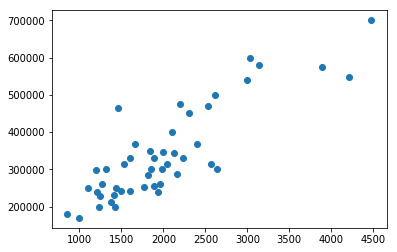

In [139]:
plt.scatter(LivingArea, Price)

In [130]:
LivingArea.min()

852

In [140]:
x = np.array(LivingArea)
y = np.array(Price)

In [141]:
x.shape

(47,)

In [167]:
x.min()

-1.461049383046193

In [143]:
np.mean(x)

2000.6808510638298

In [144]:
np.std(x)

786.2026187430467

In [145]:
x = (x - np.mean(x)) / np.std(x)

In [146]:
x = x.reshape(x.shape[0], 1)
x.shape

(47, 1)

In [147]:
x_intercept = np.ones((x.shape[0], 1), dtype = x.dtype)
x_intercept.shape

(47, 1)

In [148]:
X = np.concatenate((x_intercept, x), axis = 1)
X.shape
X

array([[ 1.00000000e+00,  1.31415422e-01],
       [ 1.00000000e+00, -5.09640698e-01],
       [ 1.00000000e+00,  5.07908699e-01],
       [ 1.00000000e+00, -7.43677059e-01],
       [ 1.00000000e+00,  1.27107075e+00],
       [ 1.00000000e+00, -1.99450507e-02],
       [ 1.00000000e+00, -5.93588523e-01],
       [ 1.00000000e+00, -7.29685755e-01],
       [ 1.00000000e+00, -7.89466782e-01],
       [ 1.00000000e+00, -6.44465993e-01],
       [ 1.00000000e+00, -7.71822042e-02],
       [ 1.00000000e+00, -8.65999486e-04],
       [ 1.00000000e+00, -1.40779041e-01],
       [ 1.00000000e+00,  3.15099326e+00],
       [ 1.00000000e+00, -9.31923697e-01],
       [ 1.00000000e+00,  3.80715024e-01],
       [ 1.00000000e+00, -8.65782986e-01],
       [ 1.00000000e+00, -9.72625673e-01],
       [ 1.00000000e+00,  7.73743478e-01],
       [ 1.00000000e+00,  1.31050078e+00],
       [ 1.00000000e+00, -2.97227261e-01],
       [ 1.00000000e+00, -1.43322915e-01],
       [ 1.00000000e+00, -5.04552951e-01],
       [ 1.

In [149]:
y

array([399900, 329900, 369000, 232000, 539900, 299900, 314900, 198999,
       212000, 242500, 239999, 347000, 329999, 699900, 259900, 449900,
       299900, 199900, 499998, 599000, 252900, 255000, 242900, 259900,
       573900, 249900, 464500, 469000, 475000, 299900, 349900, 169900,
       314900, 579900, 285900, 249900, 229900, 345000, 549000, 287000,
       368500, 329900, 314000, 299000, 179900, 299900, 239500],
      dtype=int64)

In [58]:
theta = np.zeros(X.shape[1], dtype = x.dtype)  # Init theta
theta.shape

(2,)

In [50]:
(np.dot(X[0, :], theta) - y[0]) * X[0, 1]

-841389.6

In [42]:
a = 2
b = a
b = 3  # Creates a new object for b
a

2

In [47]:
aa = np.array([0, 1])  # Like list, it's in place change
bb = aa
aa[0] = 3
bb

array([3, 1])

In [64]:
s = np.zeros(X.shape[1], dtype = x.dtype)
s[1] = 2
s

array([0, 2], dtype=int64)

In [150]:
# Gradient Descent
def gradientDescent(X, y, alpha = 0.001, threshold = 0.01, loopNumLimit = 5000):
    theta = np.zeros(X.shape[1], dtype = X.dtype)  # Init theta
    m = X.shape[0]  # Number of training examples
    n = X.shape[1]  # Number of features (including the intercept term)
    iterNum = 1
    
    while iterNum <= loopNumLimit:
        print("----------------------", theta)
        s = np.zeros(X.shape[1], dtype = x.dtype)
        for j in range(theta.shape[0]):
            for i in range(m):
#                 print("X[i, :] ", X[i, :])
#                 print("y[i]: ", y[i])
#                 print("theta: ", theta)
#                 print("X[i, j]: ", X[i, j])
#                 print(i, j, (np.dot(X[i, :], theta) - y[i]) * X[i, j])
                s[j] += (np.dot(X[i, :], theta) - y[i]) * X[i, j]
#                 print("~~~~~ s[j]:", s[j])
            s[j] = alpha * s[j]
            print("After update s[j] is: ", s[j])
        if all(abs(element) <= threshold for element in s):
            break
        else:
            print("Before update theta is: ", theta)
            theta = theta - s
            print("After update theta is: ", theta)
            iterNum += 1
    print("Number of iteration is: ", iterNum)
    return theta

In [151]:
updatedtheta = gradientDescent(X, y)
updatedtheta

---------------------- [0. 0.]
After update s[j] is:  -15999.395
After update s[j] is:  -4970.914274162334
Before update theta is:  [0. 0.]
After update theta is:  [15999.395       4970.91427416]
---------------------- [15999.395       4970.91427416]
After update s[j] is:  -15247.423435000002
After update s[j] is:  -4737.281303276703
Before update theta is:  [15999.395       4970.91427416]
After update theta is:  [31246.818435    9708.19557744]
---------------------- [31246.818435    9708.19557744]
After update s[j] is:  -14530.794533555
After update s[j] is:  -4514.629082022699
Before update theta is:  [31246.818435    9708.19557744]
After update theta is:  [45777.61296855 14222.82465946]
---------------------- [45777.61296855 14222.82465946]
After update s[j] is:  -13847.847190477922
After update s[j] is:  -4302.441515167631
Before update theta is:  [45777.61296855 14222.82465946]
After update theta is:  [59625.46015903 18525.26617463]
---------------------- [59625.46015903 18525.266

After update s[j] is:  -700.0710232563113
After update s[j] is:  -217.50778966531126
Before update theta is:  [325517.53142008 101136.30818079]
After update theta is:  [326217.60244333 101353.81597045]
---------------------- [326217.60244333 101353.81597045]
After update s[j] is:  -667.1676851632661
After update s[j] is:  -207.28492355104137
Before update theta is:  [326217.60244333 101353.81597045]
After update theta is:  [326884.7701285 101561.100894 ]
---------------------- [326884.7701285 101561.100894 ]
After update s[j] is:  -635.8108039605926
After update s[j] is:  -197.54253214414237
Before update theta is:  [326884.7701285 101561.100894 ]
After update theta is:  [327520.58093246 101758.64342615]
---------------------- [327520.58093246 101758.64342615]
After update s[j] is:  -605.9276961744445
After update s[j] is:  -188.25803313336763
Before update theta is:  [327520.58093246 101758.64342615]
After update theta is:  [328126.50862863 101946.90145928]
---------------------- [328

After update s[j] is:  -15.612816395710572
After update s[j] is:  -4.8508066637090765
Before update theta is:  [340080.47199158 105660.9248404 ]
After update theta is:  [340096.08480798 105665.77564706]
---------------------- [340096.08480798 105665.77564706]
After update s[j] is:  -14.879014025112847
After update s[j] is:  -4.622818750515327
Before update theta is:  [340096.08480798 105665.77564706]
After update theta is:  [340110.963822   105670.39846581]
---------------------- [340110.963822   105670.39846581]
After update s[j] is:  -14.179700365933444
After update s[j] is:  -4.40554626924072
Before update theta is:  [340110.963822   105670.39846581]
After update theta is:  [340125.14352237 105674.80401208]
---------------------- [340125.14352237 105674.80401208]
After update s[j] is:  -13.513254448734514
After update s[j] is:  -4.198485594586485
Before update theta is:  [340125.14352237 105674.80401208]
After update theta is:  [340138.65677682 105679.00249767]
---------------------

After update s[j] is:  -0.233704301361171
Before update theta is:  [340396.65529469 105759.16106087]
After update theta is:  [340397.40749584 105759.39476517]
---------------------- [340397.40749584 105759.39476517]
After update s[j] is:  -0.7168476953864737
After update s[j] is:  -0.22272019919689592
Before update theta is:  [340397.40749584 105759.39476517]
After update theta is:  [340398.12434354 105759.61748537]
---------------------- [340398.12434354 105759.61748537]
After update s[j] is:  -0.6831558537023374
After update s[j] is:  -0.21225234983498922
Before update theta is:  [340398.12434354 105759.61748537]
After update theta is:  [340398.80749939 105759.82973772]
---------------------- [340398.80749939 105759.82973772]
After update s[j] is:  -0.6510475285779103
After update s[j] is:  -0.20227648939253415
Before update theta is:  [340398.80749939 105759.82973772]
After update theta is:  [340399.45854692 105760.03201421]
---------------------- [340399.45854692 105760.03201421]
A

After update s[j] is:  -0.01181480465067125
Before update theta is:  [340411.85048607 105763.88211399]
After update theta is:  [340411.88851322 105763.8939288 ]
---------------------- [340411.88851322 105763.8939288 ]
After update s[j] is:  -0.036239878498192414
After update s[j] is:  -0.01125950883196856
Before update theta is:  [340411.88851322 105763.8939288 ]
After update theta is:  [340411.9247531  105763.90518831]
---------------------- [340411.9247531  105763.90518831]
After update s[j] is:  -0.03453660420828965
After update s[j] is:  -0.010730311916920072
Before update theta is:  [340411.9247531  105763.90518831]
After update theta is:  [340411.95928971 105763.91591862]
---------------------- [340411.95928971 105763.91591862]
After update s[j] is:  -0.03291338381165406
After update s[j] is:  -0.010225987257501401
Before update theta is:  [340411.95928971 105763.91591862]
After update theta is:  [340411.99220309 105763.92614461]
---------------------- [340411.99220309 105763.926

array([340412.44939166, 105764.0681903 ])

In [172]:
# Plot the line
x_Start = LivingArea.min()
x_End = LivingArea.max()
xLine = np.array([x_Start, x_End])

In [173]:
y_Start = updatedtheta[0] + updatedtheta[1] * (xLine[0] - np.mean(LivingArea)) / np.std(LivingArea)
y_End = updatedtheta[0] + updatedtheta[1] * (xLine[1] - np.mean(LivingArea)) / np.std(LivingArea)
yLine = np.array([y_Start, y_End])

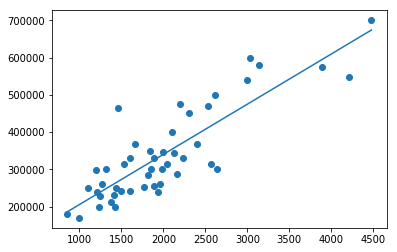

In [174]:
plt.scatter(LivingArea, Price)
plt.plot(xLine, yLine)